In [1]:
import numpy as np
import pandas as pd

# Создадим временной ряд
dates = pd.date_range(start='2024-01-01', periods=365, freq='D')
# Создадим случайные значения для временного ряда
values = np.random.randn(365).cumsum()

df = pd.DataFrame({'values': values}, index=dates)
df.head(20)

,values
2024-01-01,-0.303334
2024-01-02,-0.786290
2024-01-03,-1.663568
2024-01-04,-1.430752
2024-01-05,-1.901823
2024-01-06,-0.266666
2024-01-07,-0.552753
2024-01-08,-0.160232
2024-01-09,-1.130329
2024-01-10,-1.333091


In [2]:
# Рэсемплинг данных (агрегация по месяцам)
monthly_data = df.resample('ME').mean()
monthly_data.head(10)

,values
2024-01-31,-3.317883
2024-02-29,-3.257050
2024-03-31,-4.269554
2024-04-30,4.237810
2024-05-31,6.517854
2024-06-30,15.191956
2024-07-31,23.796828
2024-08-31,23.954492
2024-09-30,25.401420
2024-10-31,19.738859


In [3]:
df['2024-01-05': '2024-02-25']

,values
2024-01-05,-1.901823
2024-01-06,-0.266666
2024-01-07,-0.552753
2024-01-08,-0.160232
2024-01-09,-1.130329
2024-01-10,-1.333091
2024-01-11,-3.320257
2024-01-12,-3.056599
2024-01-13,-2.863744
2024-01-14,-2.286107


<Figure size 1200x800 with 0 Axes>

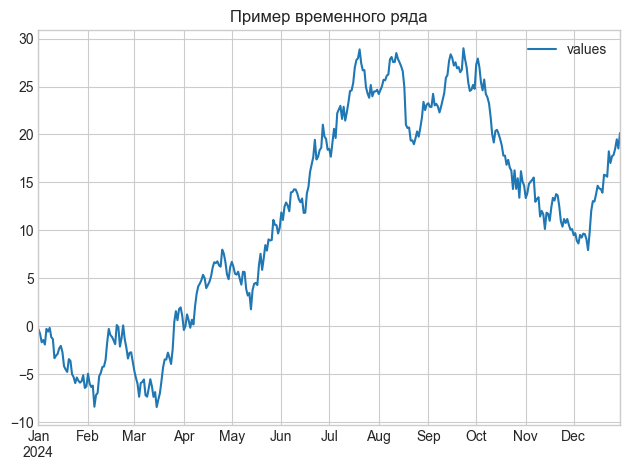

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

df.plot(title='Пример временного ряда')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

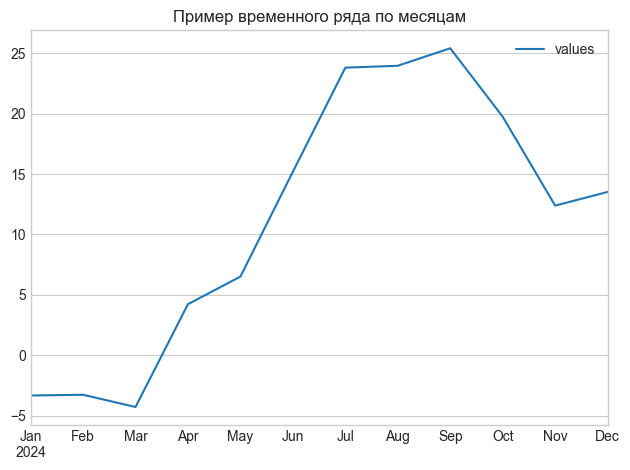

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

monthly_data.plot(title='Пример временного ряда по месяцам')
plt.tight_layout()
plt.show()

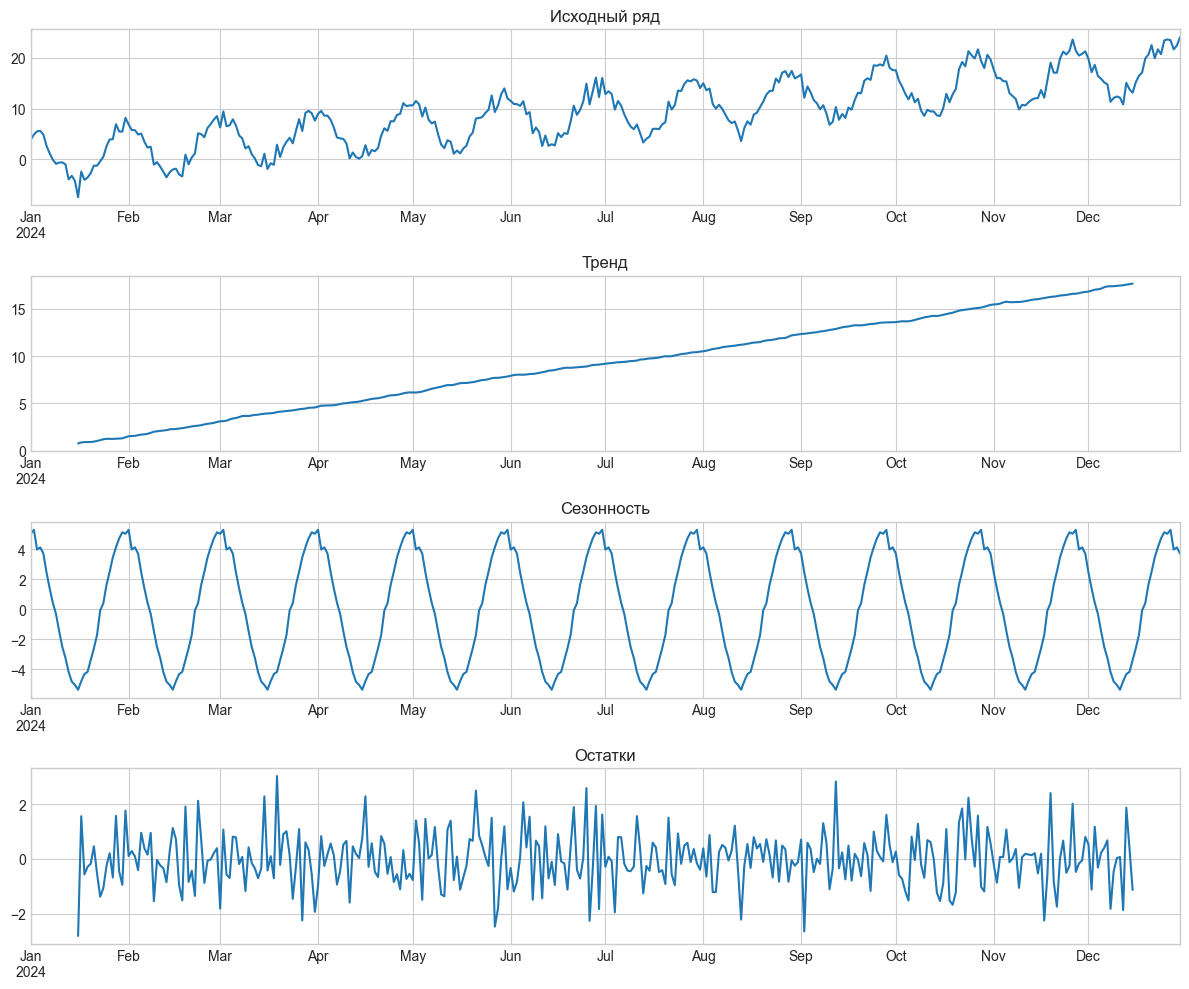

In [6]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Создадим временной ряд с трендом, сезонностью и шумом
index = pd.date_range(start='2024-01-01', periods=365, freq='D')
trend = np.arange(365) * 0.05
seasonal = 5 * np.cos(np.arange(365) * 4 * np.pi / 60)
noise = np.random.normal(0, 1, 365)
ts_data = pd.Series(trend + seasonal + noise, index=index)

# Декомпозиция временного ряда
decomposition = seasonal_decompose(ts_data, model='additive', period=30)

# Визуализация компонентов
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1, title='Исходный ряд')
decomposition.trend.plot(ax=ax2, title='Тренд')
decomposition.seasonal.plot(ax=ax3, title='Сезонность')
decomposition.resid.plot(ax=ax4, title='Остатки')
plt.tight_layout()
plt.show()

C:\Users\kgalanov\PycharmProjects\DDDA\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:08:12 - cmdstanpy - INFO - Chain [1] start processing
15:08:12 - cmdstanpy - INFO - Chain [1] done processing


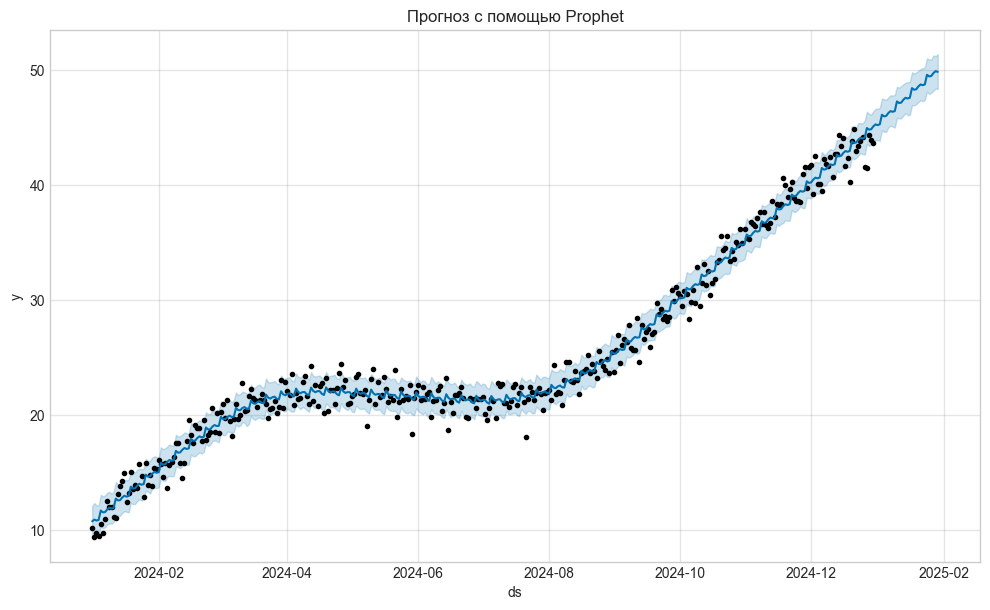

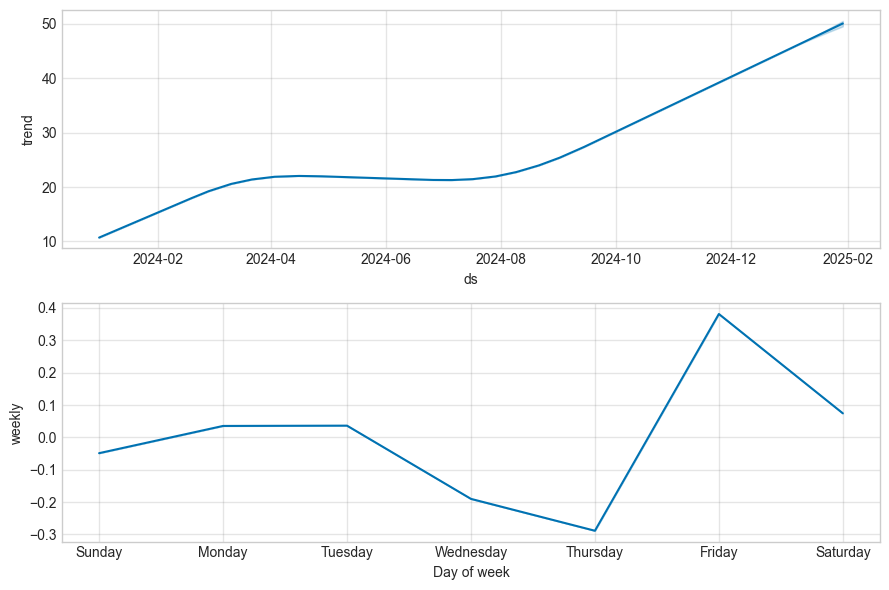

In [7]:
from prophet import Prophet

df = pd.DataFrame({'ds': pd.date_range(start='2024-01-01', periods=365, freq='D'),
                   'y': np.random.normal(10, 1, 365) + np.arange(365) * 0.08 + 5 * np.sin(
                       np.arange(365) * 2.5 * np.pi / 365)})
# Создание и обучение модели
model = Prophet()
model.fit(df)

# Создание будущих дат для прогноза
future = model.make_future_dataframe(periods=30)

# Прогнозирование
forecast = model.predict(future)

# Визуализация результатов
fig = model.plot(forecast)
plt.title('Прогноз с помощью Prophet')
plt.show()

# Компоненты прогноза
fig = model.plot_components(forecast)
plt.show()

In [8]:
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

# Создаем данные в формате для TSFresh
time_values = list(range(100)) * 3 # 3 временных ряда по 100 точек
id_values = [0] * 100 + [1] * 100 + [2] * 100 # идентификаторы рядов
value_series = [np.sin(np.linspace(0, 10, 100)), # Синусоида
                np.random.randn(100), # Белый шум
                np.linspace(0, 10, 100) # Тренд
]
value_series = np.concatenate(value_series)

df = pd.DataFrame({'id':id_values, 'time': time_values, 'value': value_series})

# Извлечение признаков
extracted_features = extract_features(df, column_id='id', column_sort='time')
impute(extracted_features) # Заполнение пропущенных значений

extracted_features

Feature Extraction: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
C:\Users\kgalanov\PycharmProjects\DDDA\.venv\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['value__fft_coefficient__attr_"real"__coeff_51'
 'value__fft_coefficient__attr_"real"__coeff_52'
 'value__fft_coefficient__attr_"real"__coeff_53'
 'value__fft_coefficient__attr_"real"__coeff_54'
 'value__fft_coefficient__attr_"real"__coeff_55'
 'value__fft_coefficient__attr_"real"__coeff_56'
 'value__fft_coefficient__attr_"real"__coeff_57'
 'value__fft_coefficient__attr_"real"__coeff_58'
 'value__fft_coefficient__attr_"real"__coeff_59'
 'value__fft_coefficient__attr_"real"__coeff_60'
 'value__fft_coefficient__attr_"real"__coeff_61'
 'value__fft_coefficient__attr_"real"__coeff_62'
 'value__fft_coefficient__attr_"real"__coeff_63'
 'value__fft_coefficient__attr_"real"__coeff_64'
 'value__fft_coefficient__attr_"real"__coeff_65'
 'value__fft_coefficient__attr_"real"__coeff_66'
 'value__fft_

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,17.919315,47.396130,0.066062,-0.005495,-9.603165e-04,0.303311,...,0.165443,0.261160,0.383650,0.826934,0.963146,1.100464,1.238841,1.378214,0.0,0.997646
1,0.0,0.0,0.0,0.0,-12.349687,94.156084,1.100734,-0.019309,-7.015842e-04,-0.167146,...,1.328822,1.978493,3.357401,1.776993,3.071868,4.169002,4.510099,4.543295,0.0,2.100394
2,1.0,0.0,0.0,0.0,500.000000,3350.168350,0.101010,0.101010,-3.469447e-18,5.000000,...,0.096509,0.096509,0.192626,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,9.696970


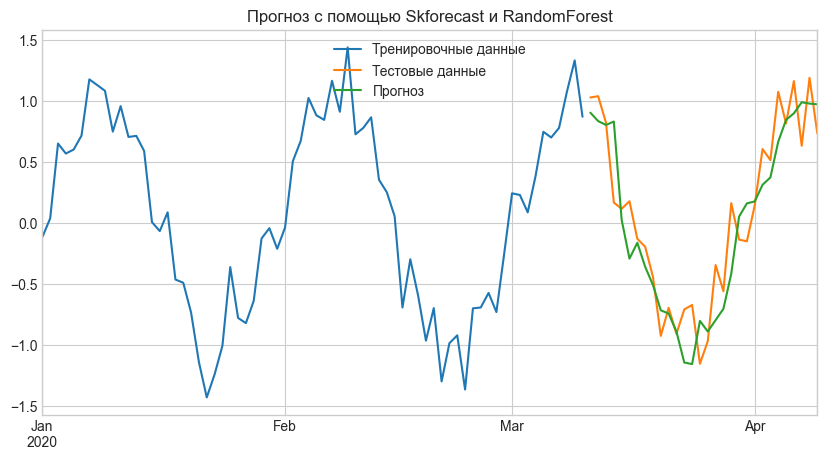

In [9]:
from skforecast.recursive import ForecasterRecursive
from sklearn.ensemble import RandomForestRegressor

# Создаем временной ряд
index = pd.date_range(start='2020-01-01', periods=100, freq='D')
data = pd.Series(np.sin(np.arange(100) * 2 * np.pi / 30) + np.random.normal(0, 0.2, 100), index=index)

# Разделение на обучающую и тестовую выборки
steps = 30
data_train = data[:-steps]
data_test = data[-steps:]

# Создание и обучение модели
forecaster = ForecasterRecursive(
    regressor=RandomForestRegressor(random_state=123),
    lags=15  # Использовать 15 предыдущих значений для прогноза
)

forecaster.fit(y=data_train)

# Прогнозирование
predictions = forecaster.predict(steps=steps)

# Визуализация результатов
fig, ax = plt.subplots(figsize=(10, 5))
data_train.plot(ax=ax, label='Тренировочные данные')
data_test.plot(ax=ax, label='Тестовые данные')
predictions.plot(ax=ax, label='Прогноз')
ax.legend()
plt.title('Прогноз с помощью Skforecast и RandomForest')
plt.show()

In [10]:
# from merlion.models.forecast.arima import Arima
# from merlion.transform.resample import TemporalResample
# from merlion.utils import TimeSeries
#
# # Создаем временной ряд
# times = pd.date_range(start='2020-01-01', periods=100, freq='D')
# values = np.sin(np.arange(100) * 2 * np.pi / 30) + np.random.normal(0, 0.2, 100)
# ts = TimeSeries.from_pd(pd.Series(values, index=times))
#
# # Определяем предобработку и модель
# transform = TemporalResample(granularity="1d")
# model = Arima(max_forecast_steps=30, transform=transform)
#
# # Обучаем модель
# model.train(ts)
#
# # Прогнозируем
# forecast = model.forecast(ts, horizon=30)
#
# # Визуализация
# fig, ax = plt.subplots(figsize=(12, 6))
# ts.plot(ax=ax, label='Исходные данные')
# forecast.plot(ax=ax, label='Прогноз')
# ax.legend()
# plt.title('Прогноз с помощью Merlion и ARIMA')
# plt.show()

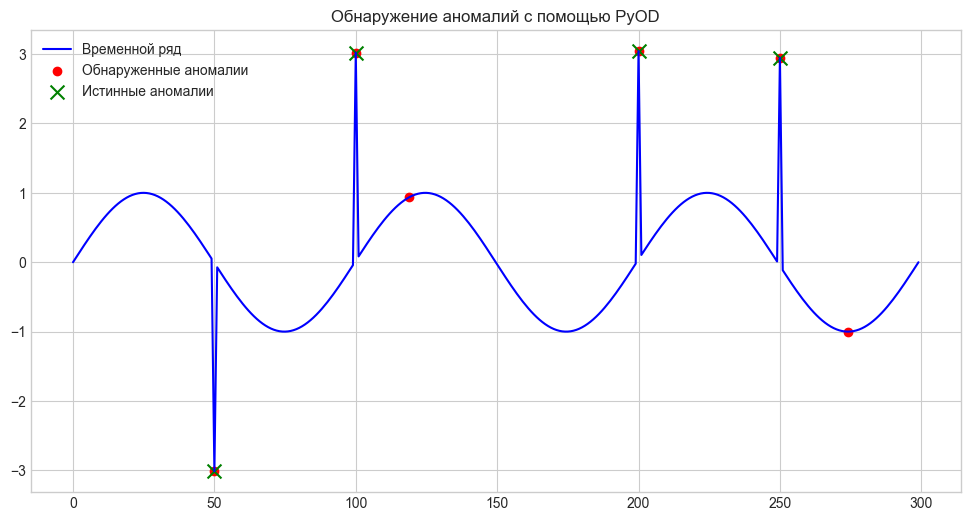

In [14]:
from pyod.models.iforest import IForest

# Создаем временной ряд с аномалиями
np.random.seed(42)
n_points = 300
values = np.sin(np.linspace(0, 6*np.pi, n_points))
# Добавляем аномалии
anomaly_indices = [50, 100, 200, 250]
for idx in anomaly_indices:
    values[idx] += 3 if np.random.random() > 0.5 else -3

# Преобразуем в формат для PyOD (2D массив)
X = values.reshape(-1, 1)

# Обнаружение аномалий с помощью Isolation Forest
clf = IForest(contamination=0.02)  # ожидаем 2% аномалий
clf.fit(X)
scores = clf.decision_scores_
labels = clf.labels_  # бинарные метки (0: нормальные, 1: аномалии)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(values, 'b-', label='Временной ряд')
plt.scatter(np.where(labels == 1)[0], values[labels == 1], c='r', label='Обнаруженные аномалии')
plt.scatter(anomaly_indices, values[anomaly_indices], marker='x', c='g', s=100, label='Истинные аномалии')
plt.legend()
plt.title('Обнаружение аномалий с помощью PyOD')
plt.show()